In [1]:
import pandas as pd
import numpy as np
import pickle

In [3]:
re = pd.read_pickle('recommend_cat_new_pred.pkl')
re = re.reset_index()
re

,level_0,index,isbn,title,categoryName,salesPoint,adult,rank,genres,mood,interest,rank_pred
0,0,198,9791165341909,달러구트 꿈 백화점 (50만 부 기념 드림 에디션) - 주문하신 꿈은 매진입니다,소설,379054,False,8,"[역사, 동화, 로맨스, 미스터리, 판타지, 무협]","[행복, 위로]","[일기, 동물, 사랑, 생각, 진로, 설득]",8.000000
1,1,559,9791161571188,불편한 편의점 (40만부 기념 벚꽃 에디션),소설,330837,False,10,"[시대, 동화]","[위로, 힐링, 행복]","[시간, 심리, 관계, 사랑, 생각]",10.000000
2,2,40339,9791192186313,시맨틱 에러 포토에세이,에세이,242520,False,10,[판타지],[위로],"[사랑, 청춘, 영화, 사진]",10.000000
3,3,199,9788954681179,밝은 밤 (별밤 에디션),소설,204554,False,10,"[예술, 동화, 로맨스]","[행복, 위로, 열정]","[사랑, 생각, 인생, 청춘, 관계, 시간, 가족]",10.000000
4,4,200,9791165343729,달러구트 꿈 백화점 2 - 단골손님을 찾습니다,소설,191493,False,9,"[동화, 로맨스, 미스터리, 판타지, 무협]","[행복, 위로]","[사랑, 생각, 인생]",9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
54369,54369,40072,9791192227726,[큰글씨책] 천직을 넘어 전설을 꿈꾸다 - 택시대학 정태성의 끝나지 않은 도전,자기계발,0,False,0,[동화],"[열정, 도전, 행복]","[성공, 사랑, 인생, 청춘, 취미, 일기]",9.326712
54370,54370,40073,9791192227658,"[큰글씨책] 완벽한 소통법 - 일, 관계, 갈등이 술술 풀리는 커뮤니케이션의 법칙",자기계발,0,False,0,[],"[고민, 위로, 힐링, 행복]","[심리, 관계, 설득, 생각, 진로]",9.288758
54371,54371,40074,9791164409464,희망을 모아 나누는 우리 - 농업 공동체 ‘해 뜨는 마을’ 이야기,에세이,0,False,0,"[시대, 동화]","[행복, 위로, 희망, 도전, 열망, 고통, 슬픔, 절망, 용기, 열정, 긍정, 우...","[사랑, 생각, 사회, 성공, 가족, 청춘, 일상]",9.124204
54372,54372,40075,9791188519354,서번트 리더의 품격,자기계발,0,False,0,[],"[행복, 도전, 열망]","[리더십, 생각, 성공, 인생]",9.284677


In [4]:
len(re)

54374

In [5]:
카테고리 = []
장르 = []
감성 = []
관심사 = []
성인 = []
장르no = []
감성no = []
관심사no = []
성인no = []

#book = pd.read_pickle('recommend.pkl')
성인질문 = input('성인입니까? : 네 / 아니요\n')
if 성인질문 == '네':
    성인.append([True,False])
    카테고리.append(input("\n원하시는 분야를 입력해주세요 : \n소설 / 에세이 / 자기계발 / 시 / 희곡 / 선택없음\n").split())
    장르.append(input('\n책을 읽을 때 선호하는 장르가 있나요? : \n시대 / 역사 / 철학 / 로맨스 / 전쟁 /  미스터리 / 예술 /  판타지 / 자서전 / 동화 / 과학 / 무협 / 선택없음\n').split())
    장르no.append(input('원하지 않는 장르를 입력해주세요 : \n').split())
    감성.append(input('\n어떤 감성의 책을 원하세요? : \n고민 / 열정 / 도전 / 긍정 / 후회 / 행복 / 우울 / 위로 / 고통 / 자유 /\
                    \n희망 / 슬픔 / 열망 / 비극 / 불안 / 용기 / 절망 / 불행 / 유머 / 힐링 / 선택없음\n').split())
    감성no.append(input('원하지 않는 감성를 입력해주세요 : \n').split())
    관심사.append(input('\n요즘 관심있는 것이 무엇인가요? : \n리더십 / 시간 / 페미니즘 / 취업 / 진로 / 비즈니스 / 설득 / 건강 / 심리 / 시 / 희곡 / 가족 / 관계 / 동물 / 사진 / 그림 / 여행 / 미술 / 영화 / 음악 / 음식 / 일기 / 자연 / 종교 / 사랑 / 인간 / 생각 / 사회 / 인생 / 일상 / 친구 / 성공 / 청춘 / 정치 / 취미 / 스포츠 / 선택없음\n').split())
    관심사no.append(input('원하지 않는 관심사를 입력해주세요 : \n').split())
elif 성인질문 == '아니요':
    성인.append([False])
    카테고리.append(input("\n원하시는 분야를 입력해주세요 : \n소설 / 에세이 / 자기계발 / 시 / 희곡 / 선택없음\n").split())
    장르.append(input('\n책을 읽을 때 선호하는 장르가 있나요? : \n시대 / 역사 / 철학 / 로맨스 / 전쟁 /  미스터리 / 예술 /  판타지 / 자서전 / 동화 / 과학 / 무협 / 선택없음\n').split())
    장르no.append(input('원하지 않는 장르를 입력해주세요 : \n').split())
    감성.append(input('\n어떤 감성의 책을 원하세요? : \n고민 / 열정 / 도전 / 긍정 / 후회 / 행복 / 우울 / 위로 / 고통 / 자유 /\
                    \n희망 / 슬픔 / 열망 / 비극 / 불안 / 용기 / 절망 / 불행 / 유머 / 힐링 / 선택없음\n').split())
    감성no.append(input('원하지 않는 감성를 입력해주세요 : \n').split())
    관심사.append(input('\n요즘 관심있는 것이 무엇인가요? : \n리더십 / 시간 / 페미니즘 / 취업 / 진로 / 비즈니스 / 설득 / 건강 / 심리 / 시 / 희곡 / 가족 / 관계 / 동물 / 사진 / 그림 / 여행 / 미술 / 영화 / 음악 / 음식 / 일기 / 자연 / 종교 / 사랑 / 인간 / 생각 / 사회 / 인생 / 일상 / 친구 / 성공 / 청춘 / 정치 / 취미 / 스포츠 / 선택없음\n').split())
    관심사no.append(input('원하지 않는 관심사를 입력해주세요 : \n').split())

성인입니까? : 네 / 아니요
네

원하시는 분야를 입력해주세요 : 
소설 / 에세이 / 자기계발 / 시 / 희곡 / 선택없음
소설 에세이

책을 읽을 때 선호하는 장르가 있나요? : 
시대 / 역사 / 철학 / 로맨스 / 전쟁 /  미스터리 / 예술 /  판타지 / 자서전 / 동화 / 과학 / 무협 / 선택없음
전쟁
원하지 않는 장르를 입력해주세요 : 
과학

어떤 감성의 책을 원하세요? : 
고민 / 열정 / 도전 / 긍정 / 후회 / 행복 / 우울 / 위로 / 고통 / 자유 /                    
희망 / 슬픔 / 열망 / 비극 / 불안 / 용기 / 절망 / 불행 / 유머 / 힐링 / 선택없음
희망
원하지 않는 감성를 입력해주세요 : 
우울

요즘 관심있는 것이 무엇인가요? : 
리더십 / 시간 / 페미니즘 / 취업 / 진로 / 비즈니스 / 설득 / 건강 / 심리 / 시 / 희곡 / 가족 / 관계 / 동물 / 사진 / 그림 / 여행 / 미술 / 영화 / 음악 / 음식 / 일기 / 자연 / 종교 / 사랑 / 인간 / 생각 / 사회 / 인생 / 일상 / 친구 / 성공 / 청춘 / 정치 / 취미 / 스포츠 / 선택없음
선택없음
원하지 않는 관심사를 입력해주세요 : 
종교


In [6]:
성인, 카테고리, 장르, 장르no, 감성, 감성no, 관심사, 관심사no

([[True, False]],
 [['소설', '에세이']],
 [['전쟁']],
 [['과학']],
 [['희망']],
 [['우울']],
 [['선택없음']],
 [['종교']])

In [7]:
# 관심있는 것
def category(카테고리):
    if 카테고리[0][0] != '선택없음':
        return (re['categoryName'][i] in 카테고리[0])
    else:
        return True

def genresand(장르):
    if 장르[0][0] == '선택없음':
        return True
    elif (len(장르[0]) == 1):
        return (장르[0][0] in re['genres'][i])
    elif (len(장르[0]) == 2):
        return (장르[0][0] in re['genres'][i]) & (장르[0][1] in re['genres'][i])


def moodand(감성):
    if 감성[0][0] == '선택없음':
        return True
    elif (len(감성[0]) == 1):
        return (감성[0][0] in re['mood'][i])
    elif (len(감성[0]) == 2):
        return (감성[0][0] in re['mood'][i]) & (감성[0][1] in re['mood'][i])

def interestand(관심사):
    if 관심사[0][0] == '선택없음':
        return True
    elif (len(관심사[0]) == 1):
        return (관심사[0][0] in re['interest'][i])
    elif (len(관심사[0]) == 2):
        return (관심사[0][0] in re['interest'][i]) & (관심사[0][1] in re['interest'][i])
    
def genresor(장르):
    if 장르[0][0] == '선택없음':
        return True
    elif (len(장르[0]) == 1):
        return (장르[0][0] in re['genres'][i])
    elif (len(장르[0]) == 2):
        return (장르[0][0] in re['genres'][i]) | (장르[0][1] in re['genres'][i])


def moodor(감성):
    if 감성[0][0] == '선택없음':
        return True
    elif (len(감성[0]) == 1):
        return (감성[0][0] in re['mood'][i])
    elif (len(감성[0]) == 2):
        return (감성[0][0] in re['mood'][i]) | (감성[0][1] in re['mood'][i])

def interestor(관심사):
    if 관심사[0][0] == '선택없음':
        return True
    elif (len(관심사[0]) == 1):
        return (관심사[0][0] in re['interest'][i])
    elif (len(관심사[0]) == 2):
        return (관심사[0][0] in re['interest'][i]) | (관심사[0][1] in re['interest'][i])

In [8]:
# 관심없는 것

def nogenresand(장르no):
    if 장르no[0][0] == '선택없음':
        return True
    elif (len(장르no[0]) == 1):
        return (장르no[0][0] not in re['genres'][i])
    elif (len(장르no[0]) == 2):
        return (장르no[0][0] not in re['genres'][i]) & (장르no[0][1] not in re['genres'][i])


def nomoodand(감성no):
    if 감성no[0][0] == '선택없음':
        return True
    elif (len(감성no[0]) == 1):
        return (감성no[0][0] not in re['mood'][i])
    elif (len(감성no[0]) == 2):
        return (감성no[0][0] not in re['mood'][i]) & (감성no[0][1] not in re['mood'][i])

def nointerestand(관심사no):
    if 관심사no[0][0] == '선택없음':
        return True
    elif (len(관심사no[0]) == 1):
        return (관심사no[0][0] not in re['interest'][i])
    elif (len(관심사no[0]) == 2):
        return (관심사no[0][0] not in re['interest'][i]) & (관심사no[0][1] not in re['interest'][i])

In [9]:
select_list_and = []
for i in range(len(re)):
    if (re['adult'][i] in 성인[0]) & category(카테고리) & genresand(장르) & moodand(감성) & interestand(관심사)\
    & nogenresand(장르no) & nomoodand(감성no) & nointerestand(관심사no) :
        select_list_and.append(re.loc[i])
        
select_book_and = pd.DataFrame(select_list_and)

select_list_or = []
for i in range(len(re)):
    if (re['adult'][i] in 성인[0]) & category(카테고리) & genresor(장르) & moodor(감성) & interestor(관심사)\
    & nogenresand(장르no) & nomoodand(감성no) & nointerestand(관심사no):
        select_list_or.append(re.loc[i])
        
select_book_or = pd.DataFrame(select_list_or)

if len(select_book_and) >= 20:
    a = select_book_and
else:
    a = select_book_or

a

## score

,level_0,index,isbn,title,categoryName,salesPoint,adult,rank,genres,mood,interest,rank_pred
93,93,1126,9788932916194,창문 넘어 도망친 100세 노인 (리커버),소설,41013,False,9,"[역사, 동화, 로맨스, 전쟁]","[도전, 고민, 후회, 행복, 희망, 불행]","[생각, 시간, 사회, 정치, 인생, 청춘, 사랑, 성공]",9.000000
250,250,2480,9788954617383,기나긴 하루 (타계 10주기 특별판),소설,23343,False,9,"[예술, 자서전, 전쟁]","[고민, 후회, 행복, 희망, 불행]","[생각, 시간, 사진, 사랑, 인생, 성공]",9.000000
933,933,1007,9788954644938,제5도살장 (리커버 에디션),소설,8916,False,9,"[전쟁, 예술, 동화]","[행복, 유머, 긍정, 위로, 희망, 열망, 용기, 절망]","[생각, 관계, 시간, 여행, 인간, 청춘]",9.000000
935,935,7149,9788984371118,모멘트,소설,8905,False,9,"[전쟁, 동화]","[행복, 열정, 비극, 불행, 희망]","[생각, 사랑, 인생, 청춘, 시간, 일기, 성공]",9.000000
967,967,43022,9788995501405,꽃으로도 때리지 말라,에세이,8715,False,9,"[전쟁, 자서전]","[고통, 슬픔, 비극, 절망, 불행, 자유, 행복, 희망]","[인생, 청춘, 사랑, 성공]",9.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
53839,53839,38729,9791161951645,데미안 / 수레바퀴 아래서,소설,20,False,0,"[전쟁, 자서전]","[위로, 희망, 행복, 자유, 열망]","[생각, 사회, 인간, 인생, 청춘]",8.865063
53846,53846,38868,9791165399542,불사조 1 : 선과 악,소설,20,True,0,"[동화, 전쟁]","[위로, 고통, 희망, 슬픔, 불안]","[페미니즘, 청춘, 생각, 인생, 인간]",8.752643
54064,54064,39299,9791127297428,"[큰글씨 특별판] 작은 아씨들, 1부 - Little Women, Vol. 1 (영...",소설,20,False,0,[전쟁],"[긍정, 자유, 희망, 열망, 용기]","[가족, 영화]",8.740295
54083,54083,39322,9791158607111,버블 비너스,소설,20,False,0,"[전쟁, 예술, 동화]","[열정, 자유, 열망, 희망]","[사랑, 인간, 일상]",8.826986


In [70]:
a.loc[a.head(3).index[0]]['title']

'지도 밖으로 행군하라'

In [11]:
pd.read_pickle('books1.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'books1.pkl'

In [9]:
books_all = pd.read_pickle('books_all.pkl')

In [12]:
books_all = books_all[['isbn','rank_mean', 'review_title', 'review_id', 'review_rank',
        'review_text', 'rank_percentage']]

In [10]:
a.columns, books_all.columns

(Index(['index', 'isbn', 'title', 'categoryName', 'salesPoint', 'adult', 'rank',
        'genres', 'mood', 'interest'],
       dtype='object'),
 Index(['isbn', 'rank_mean', 'review_title', 'review_id', 'review_rank',
        'review_text', 'rank_percentage', 'title', 'categoryName', 'salesPoint',
        'adult', 'rank', 'genres', 'mood', 'interest'],
       dtype='object'))

In [14]:
b = pd.merge(a, books_all, on = 'isbn')

In [55]:
b.head(2)

,index,isbn,title,categoryName,salesPoint,adult,rank,genres,mood,interest,rank_mean,review_title,review_id,review_rank,review_text,rank_percentage
0,43012,9788971844427,지도 밖으로 행군하라,에세이,48830,False,9,[역사],"[자유, 열망]","[일기, 리더십]",9.1,내가 존경하는 사람 중 한 분 한비야님!,빨***앤,5.0,"\n사람마다 생각이 다르기 때문에 한비야님을 평가하는 방법도, 그분의 책을 받아들이...","[72%, 24%, 4%, 0%, 0%]"
1,43012,9788971844427,지도 밖으로 행군하라,에세이,48830,False,9,[역사],"[자유, 열망]","[일기, 리더십]",9.1,다른 존재의 한비야 언니..,r******9,5.0,\n정말 이 책 나오길 많이 기다렸었다. 난생처음 책사면서 예약신청하는 것 처음이였...,"[72%, 24%, 4%, 0%, 0%]"


In [16]:
ratings_matrix = b.pivot_table('review_rank', index='review_id', columns='title')
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix_T = ratings_matrix.transpose()
print(ratings_matrix_T.shape)
ratings_matrix_T.head(3)

(177, 755)


review_id,*****,**********************,0*,0******0,2*******a,2****m,4****8,5****0,7****인,9******9,...,활**독,황***이,황**과,효*이,횰*,후*,흐*엏,흑*,희*,희**로
title,,,,,,,,,,,,,,,,,,,,,
1980 - 노재열 장편소설,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Falling in - 거기, 마녀가",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[연하도서] 한줄 공감,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 도서들 간 코사인 유사도 산출
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)

print(item_sim_df.shape)
item_sim_df.head(3)

NameError: name 'ratings_matrix_T' is not defined

In [50]:
a.loc[a.head(3).index[0]]['isbn']

'9788971844427'

In [51]:
sim_books = []
for i in range(3):
    sim_book = item_sim_df[a.loc[a.head(3).index[i]]['title']].sort_values(ascending=False)[0:4]
    sim_books.append(sim_book)
sim_books_1 = pd.DataFrame(sim_books)
sim_books_1

title,지도 밖으로 행군하라,1980 - 노재열 장편소설,"인섬니악 시티 - 뉴욕, 올리버 색스 그리고 나",우리 기쁜 젊은 날 - 응답하라 1975-1980,참을 수 없는 존재의 가벼움,농담,장희창의 고전 다시 읽기,정신병원을 탈출한 여신 프레야,교수대의 비망록 - 사회주의적 낙관성으로 지켜낸 인간 존엄의 기록,롤리타 (무선)
지도 밖으로 행군하라,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
참을 수 없는 존재의 가벼움,NaN,NaN,NaN,NaN,1.000000,0.266685,0.153789,0.138053,NaN,NaN
농담,NaN,NaN,NaN,NaN,0.266685,1.000000,NaN,NaN,0.164133,0.15116


In [56]:
sim_books_1.columns

Index(['지도 밖으로 행군하라', '1980 - 노재열 장편소설', '인섬니악 시티 - 뉴욕, 올리버 색스 그리고 나',
       '우리 기쁜 젊은 날 - 응답하라 1975-1980', '참을 수 없는 존재의 가벼움', '농담', '장희창의 고전 다시 읽기',
       '정신병원을 탈출한 여신 프레야', '교수대의 비망록 - 사회주의적 낙관성으로 지켜낸 인간 존엄의 기록', '롤리타 (무선)'],
      dtype='object', name='title')

In [53]:
col = sim_books_1.columns
sim_list = []
for i in col:
    for j in a.index:
        if a['title'][j] == i:
            sim_list.append(a.loc[j])
sim_list_df = pd.DataFrame(sim_list)

In [31]:
type(sim_list_df)

pandas.core.frame.DataFrame

In [20]:
sim_list_df

NameError: name 'sim_list_df' is not defined

In [7]:
text = '안녕 책 독서 파이썬'

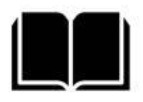

In [6]:
from PIL import Image
import numpy as np

mask = np.array(Image.open('book.jpg'))
wc = WordClound(font_path = font, background_color='white',mask=mask)
wc.generate(text)

In [ ]:
results1 = []
for se in results:
    result1 = []
    for w in se.split(' '):
      if w not in stopwords:
          result1.append(w)
    a = (" ".join(result1)).strip()
    results1.append(a)
results1